Cargamos librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)



Abrimos el archivo

In [3]:
df = pd.read_pickle('../datos/02-bikes-limpio-con-outliers.pickle')

In [4]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [5]:
df_r = df.drop(["casual","instant", "cnt"], axis=1)

In [6]:
df_r.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,654
1,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,670
2,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,1229
3,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,1454
4,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,1518


---

### Test de normalidad Variable Respuesta (ASUNCIÓN DE NORMALIDAD)

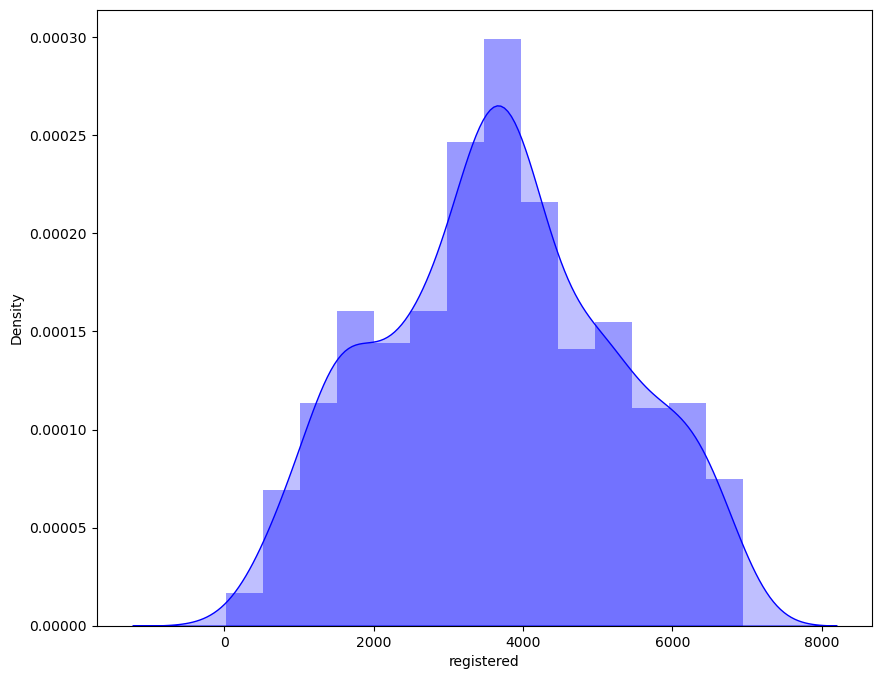

In [7]:
sns.distplot(
    df["registered"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
stats.shapiro(df_r["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

Viendo el resultado que nos da el test Shapiro en nuestra variable respuesta, vemos que el valor que presenta es menor que 0.05, por tanto debemos rechazar la hipotesis nula, es decir, nuestros datos NO SON NORMALES!

---

### ASUNCIÓN DE INDEPENDENCIA

In [10]:
df_r_numericas = df_r.select_dtypes(include=np.number)

In [11]:
df_r_continuas = pd.DataFrame(df_r[["temp", "atemp", "hum", "windspeed"]])

In [12]:
df_r_continuas.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


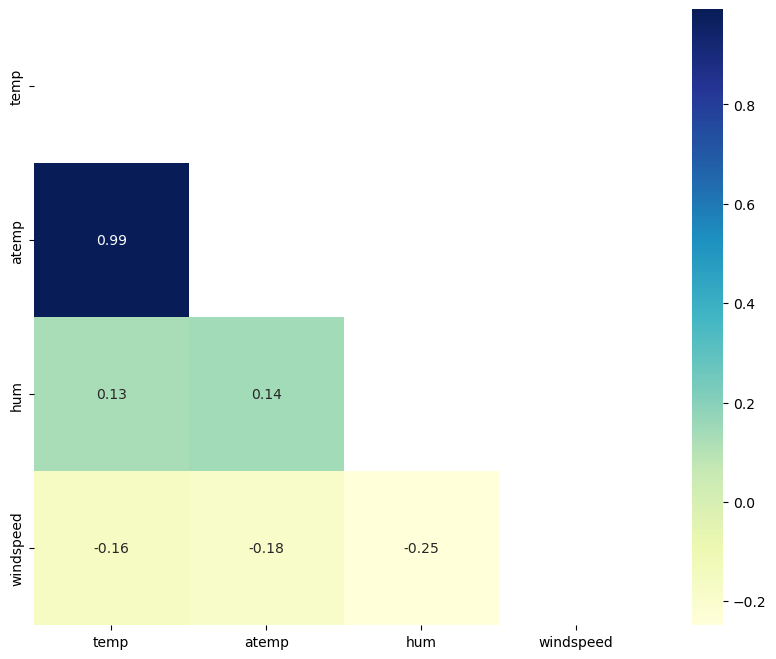

In [13]:
mask = np.triu(np.ones_like(df_r_continuas.corr(), dtype=np.bool))

sns.heatmap(df_r_continuas.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

In [14]:
predictoras = df_r.columns.drop("registered")
predictoras

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [15]:
df_r.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,654
1,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,670
2,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,1229
3,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,1454
4,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,1518


In [16]:
from itertools import combinations
# size of combination is set to 3
combinaciones = list(combinations(predictoras, 2))
print(combinaciones)
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df_r[i[0]], df_r[i[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f"INDEPENDENCIA ENTRE {i[0], i[1]} \n", test_results)
    print("........................")

[('dteday', 'season'), ('dteday', 'yr'), ('dteday', 'mnth'), ('dteday', 'holiday'), ('dteday', 'weekday'), ('dteday', 'workingday'), ('dteday', 'weathersit'), ('dteday', 'temp'), ('dteday', 'atemp'), ('dteday', 'hum'), ('dteday', 'windspeed'), ('season', 'yr'), ('season', 'mnth'), ('season', 'holiday'), ('season', 'weekday'), ('season', 'workingday'), ('season', 'weathersit'), ('season', 'temp'), ('season', 'atemp'), ('season', 'hum'), ('season', 'windspeed'), ('yr', 'mnth'), ('yr', 'holiday'), ('yr', 'weekday'), ('yr', 'workingday'), ('yr', 'weathersit'), ('yr', 'temp'), ('yr', 'atemp'), ('yr', 'hum'), ('yr', 'windspeed'), ('mnth', 'holiday'), ('mnth', 'weekday'), ('mnth', 'workingday'), ('mnth', 'weathersit'), ('mnth', 'temp'), ('mnth', 'atemp'), ('mnth', 'hum'), ('mnth', 'windspeed'), ('holiday', 'weekday'), ('holiday', 'workingday'), ('holiday', 'weathersit'), ('holiday', 'temp'), ('holiday', 'atemp'), ('holiday', 'hum'), ('holiday', 'windspeed'), ('weekday', 'workingday'), ('weekd

Hemos decidido eliminar las columnas "temp" y "weathersit" ya que son numéricas y están muy correlacionadas con respecto a otras variables. Con respecto a las variables categóricas:

season - mnth = dependiente

season - holiday = dependiente

holiday - weekday = dependiente

weekday - workingday = dependiente


Como todavía no tenemos muy claro si nos harán falta para el análisis hemos decidido seguir el estudio con ellas. En el caso que las predicciones no sean satisfactorias ya tenemos "candidatas" para cambiar nuestro estudio y volver a realizar la predicción.



In [17]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

---

ASUNCIÓN DE HOMOCEDASTICIDAD

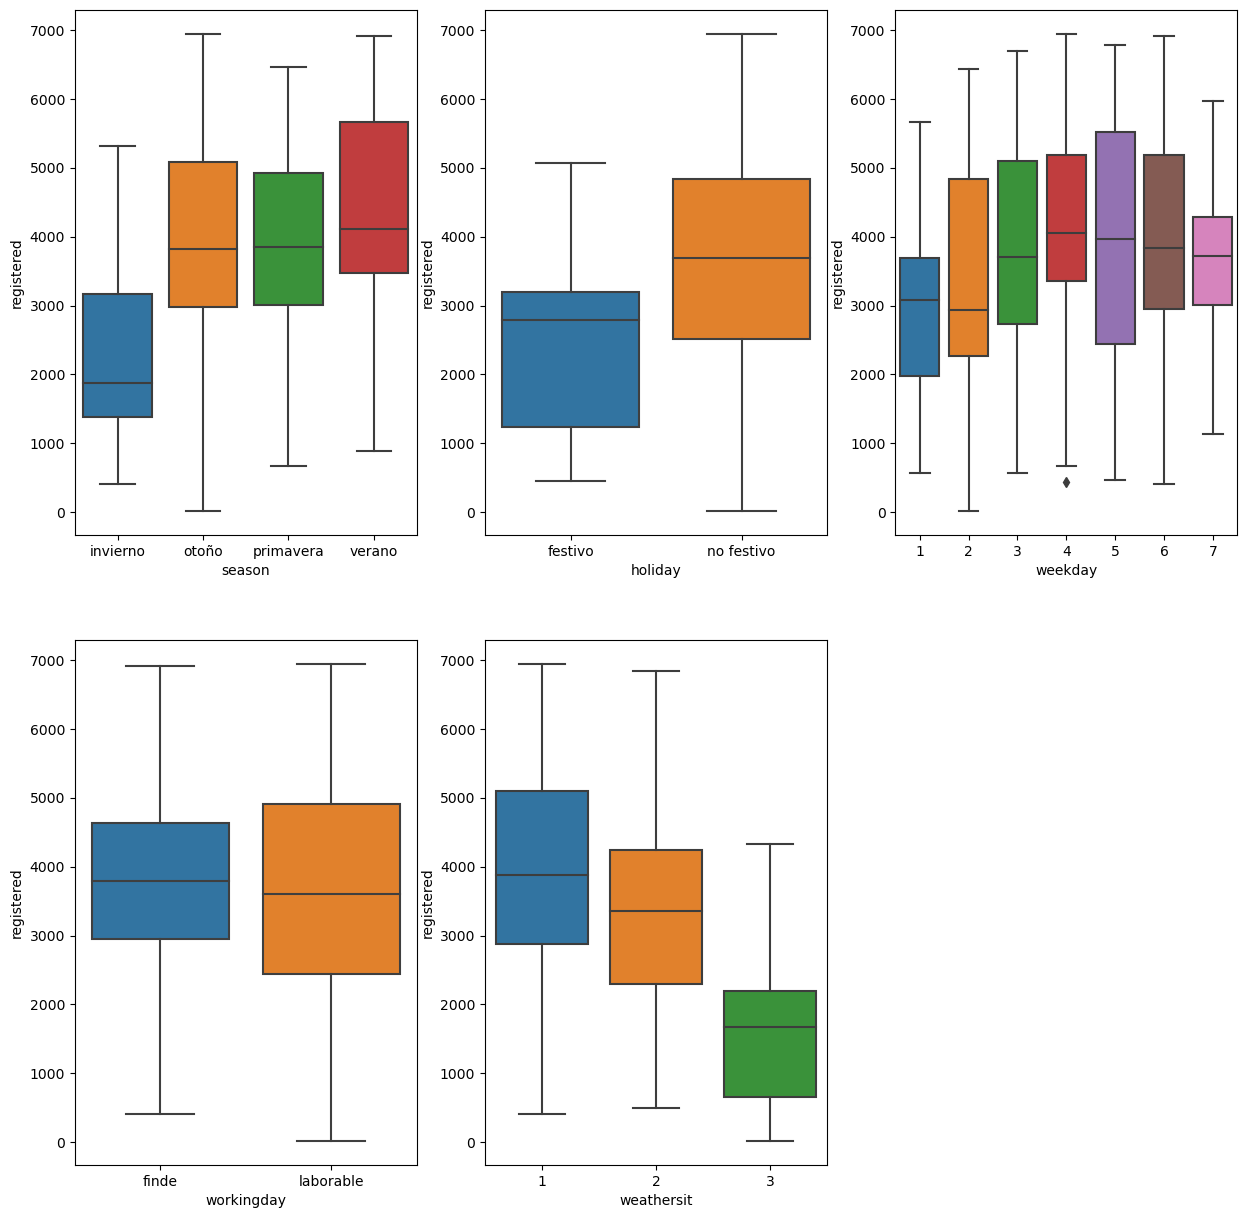

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))

axes = axes.flat

columnas_cat = df_r.select_dtypes(include = ["category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'registered',
    data    = df_r,
    palette = 'tab10',
    ax      = axes[i]
    );

fig.delaxes(axes[-1])


In [19]:
df_r.describe(include="category").T

,count,unique,top,freq
season,730,4,verano,188
holiday,730,2,no festivo,709
weekday,730,7,1,105
workingday,730,2,laborable,522
weathersit,730,3,1,463


In [20]:
def datos_test_levene(columna, df):
    valores = df[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df[df[columna] == x]["registered"]
    return d
season = datos_test_levene("season", df_r)
holiday = datos_test_levene("holiday", df_r)
workingday = datos_test_levene("workingday", df_r)


In [21]:
levene_season = stats.levene(season['invierno'], season['primavera'],season['verano'],season['otoño'], center='median')
levene_season

LeveneResult(statistic=1.528787727275075, pvalue=0.20569008595675392)

In [22]:
levene_holiday = stats.levene(holiday['festivo'], holiday['no festivo'], center='median')
levene_holiday

LeveneResult(statistic=0.30866080390685047, pvalue=0.5786738190851402)

In [23]:
levene_workingday = stats.levene(workingday['laborable'], workingday['finde'], center='median')
levene_workingday

LeveneResult(statistic=12.408670460405302, pvalue=0.0004540105913373055)

Observando la homocedasticidad de nuestras variables predictoras vemos que las variables "season" y "holiday" presentan homocedasticidad en sus datos. En el caso de la variable "workingday" presenta heterocedasticidad.

Working day a raíz de habernos salido heterocedasticidad podemos ver que está muy relacionada con las variables holiday y weekday, ya que los valores que nos da este variable podemos encontrarlos en las otras variables (pensamiento de eliminación de esta variable)

`Consultamos y definimos eliminarla del analisis.`

In [24]:
df_r_continuas

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911
726,10.386653,12.75230,59.0000,10.416557
727,10.386653,12.12000,75.2917,8.333661
728,10.489153,11.58500,48.3333,23.500518


In [25]:
numericas= df.select_dtypes(np.number)

In [26]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df_r.select_dtypes(include = np.number).drop("registered", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df_r[col], df_r.registered, center='median')
    # lo almacenamos en el charges
    resultados[col] = p_val


In [27]:
resultados

{'yr': 2.0613085773359724e-214,
 'mnth': 8.411490920240263e-214,
 'temp': 6.240911065291662e-213,
 'atemp': 8.231638671229998e-213,
 'hum': 1.136974192566387e-211,
 'windspeed': 1.5554098904763574e-213}

Todas las columnas nuemericas son heterocedasticas.

---

#### PREGUNTA: `Qué factores determinan (climatologia/tipo de día) que un cliente registrado alquile una bici o no?`



---

### SPRINT 2 :

**Proximos Pasos**

1) Normalizacion de variable respuesta (df registrados) y ver si es posible aplicar una regresion lineal o si vamos por otro modelo.
2) Hacer los mismos pasos para casuales.


---

NORMALIZAR VARIABLE RESPUESTA

In [28]:
df_r.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered'],
      dtype='object')

In [29]:
df_r["registered_box"], lambda_ajustada = stats.boxcox(df_r["registered"])


In [30]:
lambda_ajustada

0.835014421472474

In [31]:
stats.shapiro(df_r["registered_box"])

ShapiroResult(statistic=0.9854223132133484, pvalue=1.163151068794832e-06)

In [32]:
df_r["registered_raiz"] = df_r["registered"].apply(lambda x: math.sqrt(x))

In [33]:
stats.shapiro(df_r["registered_raiz"])

ShapiroResult(statistic=0.9734106659889221, pvalue=2.97543378824372e-10)

In [34]:
numericas= df_r.select_dtypes(np.number)

In [35]:
minmax= MinMaxScaler()

In [36]:
minmax.fit(df_r[["registered"]])

MinMaxScaler()

In [37]:
X_normalizadas = minmax.transform(df[["registered"]])

In [38]:

numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["registered"])
numericas_minmax.head(2)

,registered
0,0.091539
1,0.093849


In [39]:
stats.shapiro(numericas_minmax["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

In [40]:
df_r["registered_minmax"] = numericas_minmax

In [41]:
stats.shapiro(df_r["registered_minmax"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

### ` NO hemos podido normalizar la variable respuesta.`


# Se guarda el archivo solo registrados, NO normalizado, No codificado, No estandarizado

In [42]:
df_r.drop(['workingday','temp','registered_box','registered_raiz','registered_minmax'], axis = 1, inplace = True)

In [43]:
df_r.to_pickle('../datos/registrados/04-df_registrados_NO-norm.pickle')

In [44]:
df_r.to_csv('../datos/registrados/04-df_registrados_No-norm.csv')

### Vamos a proceder a realizar el encoding.